In [1]:

import numpy as np

import torch
import torch.optim as optim
import torchvision.datasets as dataset
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F


import matplotlib.pyplot as plt
%matplotlib notebook


In [2]:
# Classifying point in and out of circle #


# Random points of {0,1}x{0,1}
number_of_points=1300
input_dimension=2
output_dimension=1

# Generate and classify points that are in (1) or out (-1) of the circle
x=np.random.rand(number_of_points,input_dimension)
#y=np.array([1 if (i[0]-0.5)**2+(i[1]-0.5)**2<(0.2)**2 else -1 for i in x])
#y=np.array([1 if i[0]<i[1] else -1 for i in x])
y=np.array([1 if (i[0]<0.5 and i[1]<0.5) or (i[0]>0.5 and i[1]>0.5) else -1 for i in x])


# Convert to pytorch tennsors
dtype=torch.FloatTensor

x_tensor=torch.from_numpy(x).type(dtype)
y_tensor=torch.from_numpy(y).type(dtype)

# Convert to pytorch variables
x_variable=Variable(x_tensor,requires_grad=False)
y_variable=Variable(y_tensor,requires_grad=False)


In [3]:
# Buid the network #
# first layer has 2(=dimension) nodes, contains a hidden layer with 3 nodes
# and a final layer of 1 node
number_of_hidden=20

# Defining class# as a subclass of nn.Module
class MyNet(nn.Module):
    
    def __init__(self):
        
        super(MyNet,self).__init__()
        self.fc1=nn.Linear(input_dimension,number_of_hidden)
        self.fc2=nn.Linear(number_of_hidden,number_of_hidden)

        self.fc3=nn.Linear(number_of_hidden,output_dimension)
      
    # Define activation functions for forward pass
    def forward(self,x):
        x=F.tanh(self.fc1(x))
        x=F.tanh(self.fc2(x))
        x=F.tanh(self.fc3(x))

        return x


In [4]:
mynet=MyNet()
print(mynet)



MyNet(
  (fc1): Linear(in_features=2, out_features=20)
  (fc2): Linear(in_features=20, out_features=20)
  (fc3): Linear(in_features=20, out_features=1)
)


In [5]:
# define a learning rate
learning_rate=1e-2

#define a criterion (loss function)
Criterion=nn.MSELoss(size_average=True)

# Use optimizer (?)
# Select SGD optimizer
optimizer=optim.SGD(mynet.parameters(),lr=learning_rate,momentum=0.9)

# Train the network:
iterations=2000

for i in range(iterations):
    
    
    # Output of the network
    net_out=mynet(x_variable)
    
    # Compute the loss
    loss=Criterion(net_out,y_variable)
    print(i,loss.data[0])
    
    # Reset to zero gradients before the backwad pass
#    mynet.zero_grad()
       
    optimizer.zero_grad()
    # Execute backward pass
    loss.backward()
    optimizer.step()
    
        # Update parameters of the my network

    
    #for parameter in mynet.parameters():
     #   parameter.data -= learning_rate * parameter.grad.data
#

0 1.0019227266311646
1 1.0018678903579712
2 1.0017645359039307
3 1.0016225576400757
4 1.0014511346817017
5 1.0012587308883667
6 1.0010454654693604
7 1.0008220672607422
8 1.000588297843933
9 1.000346064567566
10 1.000095248222351
11 0.9998374581336975
12 0.9995735883712769
13 0.999305248260498
14 0.9990322589874268
15 0.9987590312957764
16 0.998487651348114
17 0.9982183575630188
18 0.9979525804519653
19 0.9976925849914551
20 0.9974384307861328
21 0.9971910715103149
22 0.9969480633735657
23 0.9967110753059387
24 0.9964788556098938
25 0.9962496161460876
26 0.9960257411003113
27 0.9958059191703796
28 0.9955881834030151
29 0.9953749179840088
30 0.9951652884483337
31 0.9949598908424377
32 0.9947556853294373
33 0.9945569038391113
34 0.9943593144416809
35 0.9941678643226624
36 0.9939751625061035
37 0.9937842488288879
38 0.9935958981513977
39 0.993407666683197
40 0.9932224750518799
41 0.9930359125137329
42 0.9928504228591919
43 0.9926666021347046
44 0.9924817085266113
45 0.9922959804534912
46 0

<IPython.core.display.Javascript object>


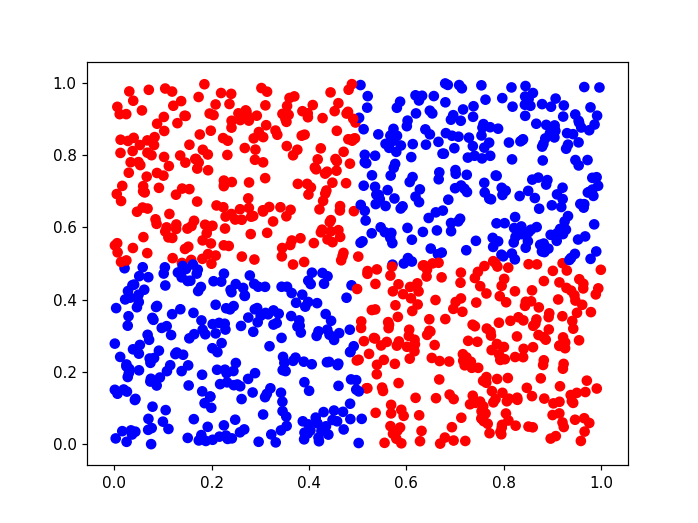

In [6]:
import matplotlib.pyplot as plt
%matplotlib tk

# Creating test data to see
x_test_array=np.random.rand(1000,input_dimension)

x_test=Variable(torch.from_numpy(x_test_array).type(dtype))
y_pred=mynet(x_test)

y_pred_array=y_pred.data.numpy()
col=['r' if i<0 else 'b' for i in y_pred_array]
plt.scatter(x_test_array[:,0],x_test_array[:,1],c=col)
